# 08-Convnets

Can you get similar results by creating a ConvNet from scratch and using the pixel values from the original images to train the model?

What accuracy can you achieve?
Can you get good results? - If not, why?

In [32]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


### 1. loading the pictures

In [33]:
# Directory containing the dataset
dataset_dir = "swissroads"

# Creating image generator for train and test, rescaling and data augmenting

train_generator = ImageDataGenerator(rescale=1/256, horizontal_flip=True, rotation_range=5) 
test_generator = ImageDataGenerator(rescale=1 / 256)

# File iterators for Train, validation and test sets

print('trainset:')
trainset = train_generator.flow_from_directory(
    os.path.join(dataset_dir, "train"),
    batch_size=32,
    target_size=(256, 256), 
    shuffle=True,
    subset="training"
)
print('validset:')
validset = train_generator.flow_from_directory(
    os.path.join(dataset_dir, "valid"),
    batch_size=32,
    target_size=(256, 256),
    shuffle=False
)
print('testset:')
testset = test_generator.flow_from_directory(
    os.path.join(dataset_dir, "test"), 
    batch_size=32, 
    target_size=(256, 256), 
    shuffle=False,
)

trainset:
Found 280 images belonging to 6 classes.
validset:
Found 139 images belonging to 6 classes.
testset:
Found 50 images belonging to 6 classes.


In [34]:
# Display the shapes of the datasets
print('Trainset:', trainset[4][0].shape, trainset[0][1].shape)
print('Validset:', validset[0][0].shape, validset[0][1].shape)
print('Testset:', testset[0][0].shape, testset[0][1].shape)

Trainset: (32, 256, 256, 3) (32, 6)
Validset: (32, 256, 256, 3) (32, 6)
Testset: (32, 256, 256, 3) (32, 6)


### 2. Defining convolutional neural network architecture using keras

In [35]:
# arbitrarily chosen parameters

input_shape = (256, 256, 3)
n_filters_conv1 = 20
n_filters_conv2 = 16
filter_size =(3, 3)
internal_activ_function = 'relu'
final_activ_function = 'softmax'
Max_pooling_dim =(2, 2)
n_neurons_hidden_layer1 = 60
n_neurons_hidden_layer2 = 40
n_labels = 6


model = Sequential([
    # first convolutional layer
    Conv2D(n_filters_conv1, filter_size, activation=internal_activ_function, input_shape=input_shape),
    MaxPooling2D(Max_pooling_dim),
    
    # second convolutional layer
    Conv2D(n_filters_conv2, filter_size, activation=internal_activ_function),
    MaxPooling2D(Max_pooling_dim),
    
    # "normal" neural network run of the filtered/transformed output
    Flatten(), #to turn 3D output into a flat vector
    
    # first hidden layer
    Dense(n_neurons_hidden_layer1, activation=internal_activ_function),
    
    # second hidden layer
    Dense(n_neurons_hidden_layer2, activation=internal_activ_function),
    
    #Output Layer
    Dense(n_labels, activation=final_activ_function) 
    
])

### 3. training & validation

In [36]:
# Compilation 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# training
history = model.fit(trainset, epochs=20, validation_data=testset)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 20)      560       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 127, 127, 20)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 16)      2896      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 62, 62, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 61504)             0         
                                                                 
 dense_8 (Dense)             (None, 60)               

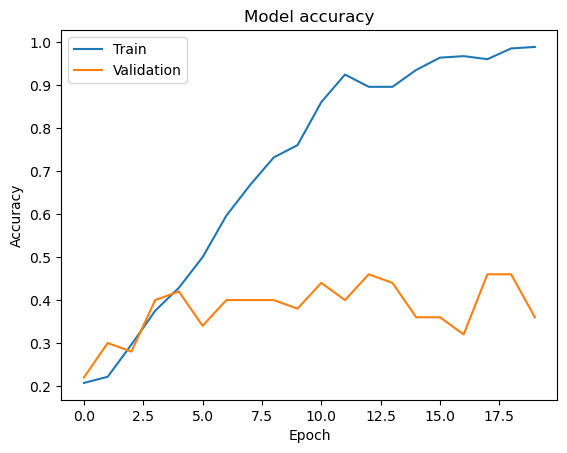

In [38]:
# Plotting accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observation: <br>

The CNN model yields globally higher average validation accuracy than those of other model but is strongly overfitting and could most likely benefit from regularisation.

This is also the only model that runs on the original features, which seems to be beneficial. By applying the kernels/filters, the method does itself some sort of feature extraction and the adventage is that it does on the actual data that we use whereas  MobileNet v2 model does its feature extraction on a different/larger set of data so its more general. Again, for the definite conclusion one should fine-tune all of these NN models and only compare the best results.